In [4]:
import os
from PIL import Image
import torchvision.transforms as tf
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

class MyDataset(Dataset):
    def __init__(self, img_dir, transform):
        self.img_dir = img_dir
        # 获取图像路径下的所有文件
        self.img_files = os.listdir(self.img_dir)
        self.transform = transform
        
        # 确保路径下的文件数目不唯一
        if len(self.img_files) == 0:
            raise ValueError("No data in img_dir!")
    
    def __len__(self):
        return len(self.img_files)
    
    def __getitem__(self, idx):
        # 打开idx对应的图片
        img = Image.open(os.path.join(self.img_dir, self.img_files[idx]))
        # 对图像进行处理以满足后续的任务
        img = self.transform(img)
        return img, self.img_files[idx]

my_dataset = MyDataset("data/", tf.ToTensor())
print(my_dataset[0][0].size(), my_dataset[0][1])
print(len(my_dataset))

torch.Size([3, 256, 256]) 2011-06-20 08_47_21.jpg
4


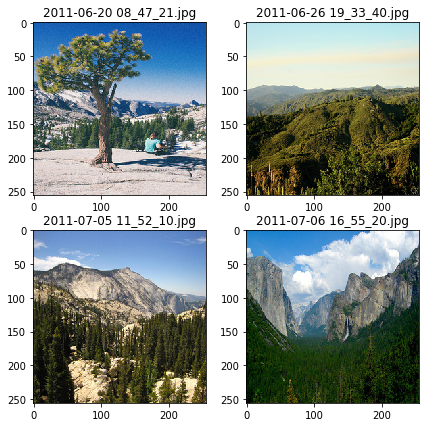

In [5]:
# 下面的代码是使用DataLoader
from torch.utils.data import DataLoader
# 定义dataloader
my_dataloader = DataLoader(dataset=my_dataset,
                          batch_size=4,
                          shuffle=True,
                          num_workers=0)

plt.figure(figsize=(7, 7))
rows = 2
cols = 2
# 获取一个batch的数据
batch = next(iter(my_dataloader))
# batch的第一个元素是图像数据，第二个数据是图像路径
img = batch[0]
path = batch[1]
for i in range(rows*cols):
    plt.subplot(rows, cols, i+1)
    plt.imshow(img[i].numpy().transpose(1, 2, 0))
    plt.title(path[i])
plt.savefig("check_dataloader.png", dpi=500, bbox_inches="tight")
plt.show()